In [8]:
import matplotlib.pyplot as plt
import pickle
from WeightsModification import *



In [12]:
with open("../save/objects/baseline_mnist_1.0_COMMS25_LOCAL10_BS64_USERS10_IID2.pkl", "rb") as f1:
     res_1 = pickle.load(f1)
     
    
with open("../save/objects/alpha_0.5_mnist_1.0_COMMS25_LOCAL10_BS64_USERS10_IID2.pkl", "rb") as f2:
     res_2 = pickle.load(f2) 



In [13]:
a = res_1.global_loss_manager.validation_total_across_communication
b = res_2.global_loss_manager.validation_total_across_communication


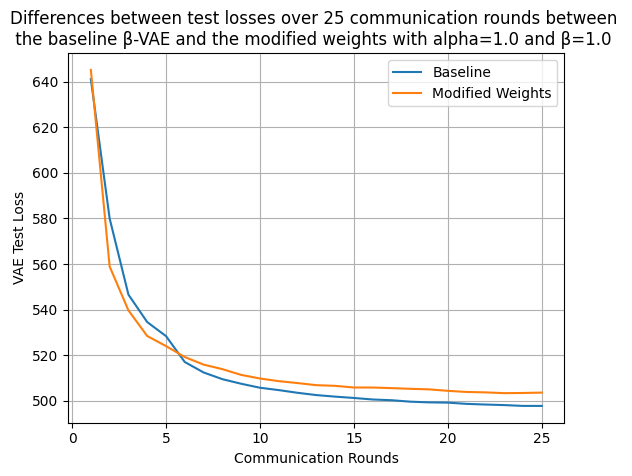

In [15]:
x_vals = list(range(1,len(a)+1))
plt.plot(x_vals, a,label="Baseline")
plt.plot(x_vals, b,label="Modified Weights")
plt.xlabel("Communication Rounds")
plt.ylabel("VAE Test Loss")
plt.title("Differences between test losses over 25 communication rounds between \n the baseline β-VAE and the modified weights with alpha=1.0 and β=1.0  ")
plt.grid()
plt.legend()
plt.show()
